In [15]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.lines as mlines

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
pyber_data= pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

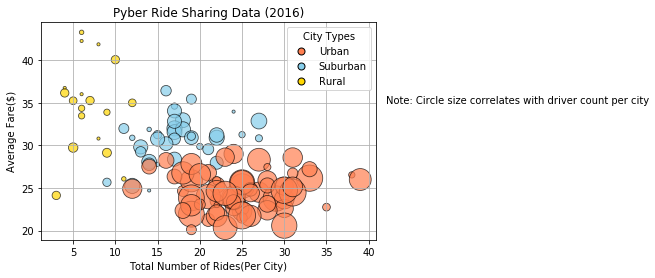

In [16]:
# Obtain the x and y coordinates for each of the three city types
bubble_df = pyber_data.groupby(['type','city'], as_index=False).mean()
bubble_df['total rides'] = pyber_data.groupby(['type','city'], as_index=False).count()['ride_id']
bubble_df = bubble_df.drop(columns='ride_id')

bubble_df.loc[bubble_df['type'] == 'Urban', 'color'] = 'coral'
bubble_df.loc[bubble_df['type'] == 'Suburban', 'color'] = 'skyblue'
bubble_df.loc[bubble_df['type'] == 'Rural', 'color'] = 'gold'

# Build the scatter plots for each city types
x = bubble_df['total rides']
y= bubble_df['fare']
size = bubble_df['driver_count']
col = bubble_df['color']
plt.scatter(x, y, alpha=0.7, s=size*10, edgecolor="black", linewidths=0.8, c=col)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.grid()

# Create a legend
urban = mlines.Line2D([0], [0], color='w', marker='o', markerfacecolor='coral', markeredgecolor='black', markersize=7, label='Urban')
suburban = mlines.Line2D([0], [0], color='w', marker='o', markerfacecolor='skyblue', markeredgecolor='black', markersize=7, label='Suburban')
rural = mlines.Line2D([0], [0], color='w', marker='o', markerfacecolor='gold', markeredgecolor='black', markersize=7, label='Rural')

plt.legend(handles=[urban, suburban, rural], title='City Types')

# Incorporate a text label regarding circle size
plt.text(42, 35, 'Note: Circle size correlates with driver count per city')

# Save Figure
plt.savefig("bubble_plot.png")


In [17]:
# Show plot
plt.show()

## Total Fares by City Type

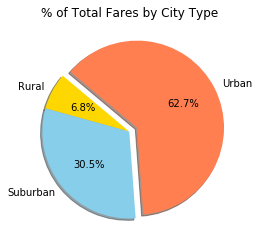

In [18]:
# Calculate Type Percents
city_type = pyber_data.groupby(pyber_data['type']).sum()
fares = [city_type['fare']]
data =pd.DataFrame(fares)

# Build Pie Chart
labels = list(data)
values = data.values.tolist()
values = values[0]
colors = ["gold", "skyblue", "coral"]
explode = (0,0,0.1)

plt.pie(values, explode = explode, labels=labels , colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("total_fares.png")

In [19]:
# Show Figure
plt.show()

## Total Rides by City Type

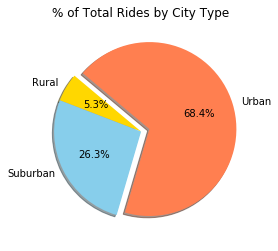

In [20]:
# Calculate Ride Percents
city_type = pyber_data.groupby(pyber_data['type']).count()
rides = [city_type['ride_id']]
data =pd.DataFrame(rides)

# Build Pie Chart
labels = list(data)
values = data.values.tolist()
values = values[0]
colors = ["gold", "skyblue", "coral"]
explode = (0,0,0.1)

plt.pie(values, explode = explode, labels=labels , colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("total_rides.png")

In [21]:
# Show Figure
plt.show()

## Total Drivers by City Type

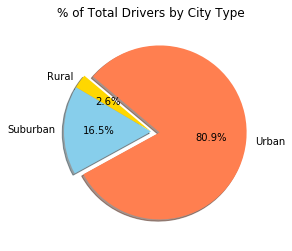

In [22]:
# Calculate Driver Percents
city_type = pyber_data.groupby(['type','city']).mean().groupby(['type']).sum()
drivers = city_type['driver_count']
data =pd.DataFrame(drivers)
values = data['driver_count'].values.tolist()
values

# Build Pie Chart
colors = ["gold", "skyblue", "coral"]
explode = (0,0,0.1)
plt.pie(values, explode = explode, labels=labels , colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("total_drivers.png")

In [23]:
# Show Figure
plt.show()

Observations: Urban cities had a higher number of total rides with lower average fares than suburban and rural cities. Rural cities had the highest fares but only accounted for 6.8% of the total fares earned. Some Urban cities with few drivers but very high ride count and low average fare count suggest that the city type may indicate an average ride distance that directly effects the average fare. 